In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/raw_sales.csv'
sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
sales_data.head()


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [38]:
from sklearn.preprocessing import StandardScaler

# Convert 'datesold' to datetime format
sales_data['datesold'] = pd.to_datetime(sales_data['datesold'])

# Check for missing values
missing_values = sales_data.isnull().sum()

# Standardize numerical features
numerical_features = ['postcode', 'price', 'bedrooms']
scaler = StandardScaler()
sales_data[numerical_features] = scaler.fit_transform(sales_data[numerical_features])

# Display missing values and the first few rows after preprocessing
missing_values, sales_data.head()

(datesold        0
 postcode        0
 price           0
 propertyType    0
 bedrooms        0
 dtype: int64,
     datesold  postcode     price propertyType  bedrooms
 0 2007-02-07 -0.840063 -0.300800        house  0.788251
 1 2007-02-27  1.197904 -1.135011        house -0.262987
 2 2007-03-07  1.191088 -1.000118        house -0.262987
 3 2007-03-09  1.191088 -0.815526        house  0.788251
 4 2007-03-21  1.197904 -1.064015        house -0.262987)

,postcode,price,bedrooms
count,2.958000e+04,2.958000e+04,2.958000e+04
mean,4.612042e-16,7.686737e-17,9.224084e-17
std,1.000017e+00,1.000017e+00,1.000017e+00
min,-8.877749e-01,-1.963898e+00,-3.416703e+00
25%,-8.400633e-01,-6.025359e-01,-2.629873e-01
50%,-7.855358e-01,-2.120539e-01,-2.629873e-01
75%,1.191088e+00,3.381707e-01,7.882512e-01
max,1.252432e+00,2.623423e+01,1.839490e+00


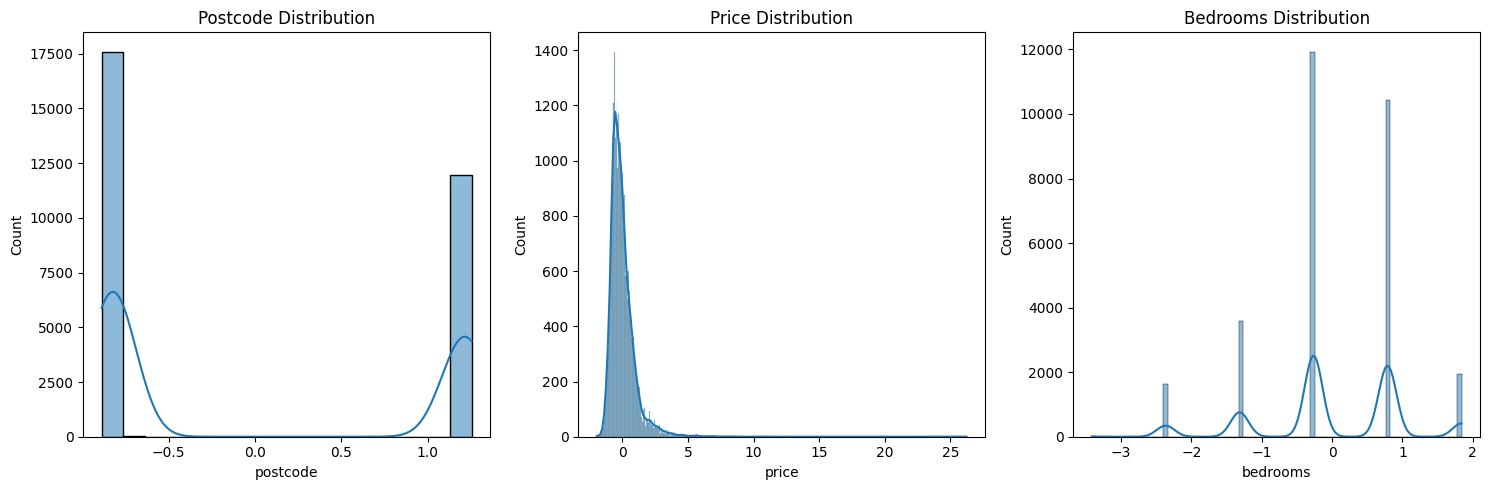

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary of the dataset
statistical_summary = sales_data.describe()

# Plotting histograms for numerical features
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(sales_data['postcode'], kde=True, ax=ax[0])
ax[0].set_title('Postcode Distribution')
sns.histplot(sales_data['price'], kde=True, ax=ax[1])
ax[1].set_title('Price Distribution')
sns.histplot(sales_data['bedrooms'], kde=True, ax=ax[2])
ax[2].set_title('Bedrooms Distribution')
plt.tight_layout()

# Display statistical summary
statistical_summary

In [40]:
# Checking the unique values and their counts in 'propertyType'
property_type_counts = sales_data['propertyType'].value_counts()

property_type_counts

house    24552
unit      5028
Name: propertyType, dtype: int64

In [41]:
# Applying one-hot encoding to the 'propertyType' column
property_type_encoded = pd.get_dummies(sales_data['propertyType'], prefix='propertyType')

# Joining the encoded columns back to the original dataframe
sales_data_encoded = sales_data.join(property_type_encoded).drop('propertyType', axis=1)

# Display the first few rows of the updated dataframe
sales_data_encoded.head()

,datesold,postcode,price,bedrooms,propertyType_house,propertyType_unit
0,2007-02-07,-0.840063,-0.300800,0.788251,1,0
1,2007-02-27,1.197904,-1.135011,-0.262987,1,0
2,2007-03-07,1.191088,-1.000118,-0.262987,1,0
3,2007-03-09,1.191088,-0.815526,0.788251,1,0
4,2007-03-21,1.197904,-1.064015,-0.262987,1,0


In [42]:
from sklearn.decomposition import PCA
import numpy as np

# Selecting features for PCA - excluding 'datesold' as it's a datetime object
features_for_pca = sales_data_encoded.drop('datesold', axis=1)

# PCA implementation - using enough components to explain 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features_for_pca)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Creating a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components,
                            columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Displaying the variance explained by each component and the first few rows of the principal components DataFrame
explained_variance, principal_df.head()

(array([0.48928857, 0.34296744, 0.12759625]),
         PC1       PC2       PC3
 0  0.300965  0.479142 -1.072226
 1 -0.588977 -1.560620 -0.119139
 2 -0.508575 -1.493161 -0.034360
 3  0.360184 -1.534040 -0.501811
 4 -0.546005 -1.528257 -0.072919)

In [43]:
# Rechecking the PCA model to access the components correctly
if hasattr(pca, 'components_'):
    pc_composition = pd.DataFrame(pca.components_, columns=features_for_pca.columns,
                                  index=[f'PC{i+1}' for i in range(pca.components_.shape[0])])
else:
    pc_composition = "PCA components are not available."

# Displaying the composition of each principal component if available
pc_composition

,postcode,price,bedrooms,propertyType_house,propertyType_unit
PC1,0.182539,0.605266,0.720134,0.202164,-0.202164
PC2,-0.875634,0.455846,-0.118930,-0.075247,0.075247
PC3,0.445811,0.651016,-0.558982,-0.180235,0.180235


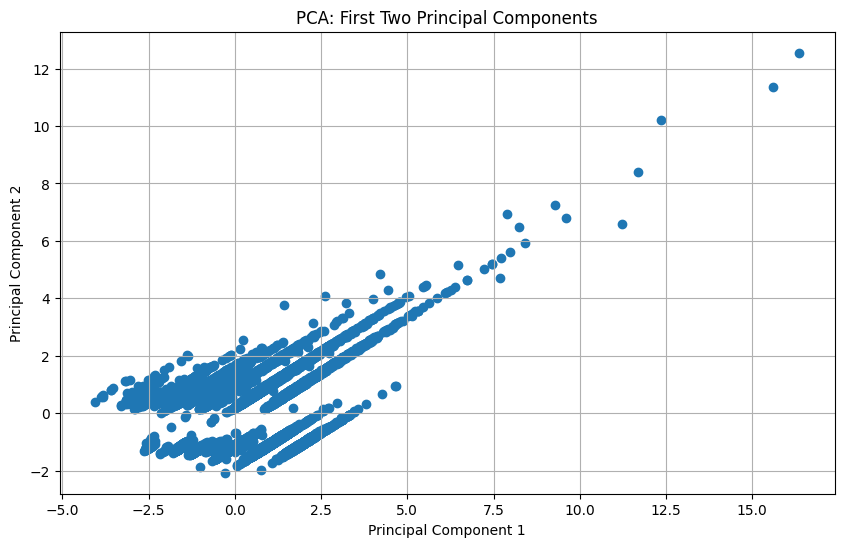

In [44]:
# Visualizing the first two principal components in a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()